##Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset

In [150]:
data = pd.read_csv('train.csv')

##Info about the Dataset

In [151]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Checking for Missing Values

In [154]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
# Checking percentage of missing values in Age
data['Age'].isna().sum()/891

0.19865319865319866

In [156]:
# Filling missing values of Age with its median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [157]:
# Checking if any missing values are left
data['Age'].isna().sum()

0

In [158]:
# Checking percentage of missing values in Cabin
data['Cabin'].isna().sum()/891

0.7710437710437711

In [159]:
# Filling missing values of Cabin with its mode since it's a categorical variable
data['Cabin'].fillna(data['Cabin'].value_counts().idxmax(),inplace=True)

In [160]:
# Checking if any missing values are left
data['Cabin'].isna().sum()

0

In [161]:
# Filling missing values of Cabin with its mode since it's a categorical variable
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(),inplace=True)

In [162]:
# Checking if any missing values are left
data['Embarked'].isna().sum()

0

In [163]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,G6,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


##Exploratory Data Analysis

###Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


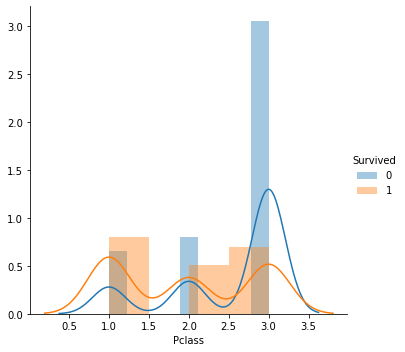

In [164]:
sns.FacetGrid(data,hue="Survived",size=5).map(sns.distplot,"Pclass").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


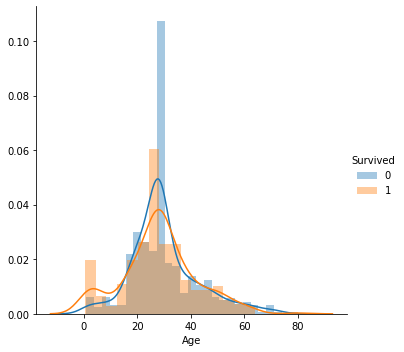

In [165]:
sns.FacetGrid(data,hue="Survived",size=5).map(sns.distplot,"Age").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


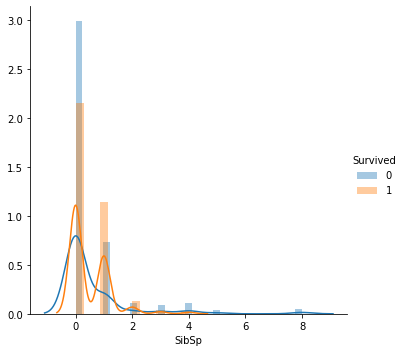

In [166]:
sns.FacetGrid(data,hue="Survived",size=5).map(sns.distplot,"SibSp").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


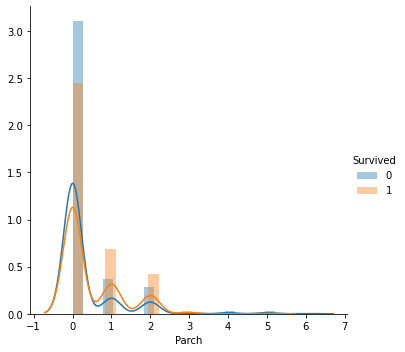

In [167]:
sns.FacetGrid(data,hue="Survived",size=5).map(sns.distplot,"Parch").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


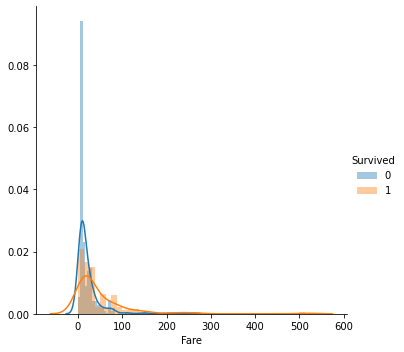

In [168]:
sns.FacetGrid(data,hue="Survived",size=5).map(sns.distplot,"Fare").add_legend()
plt.show()

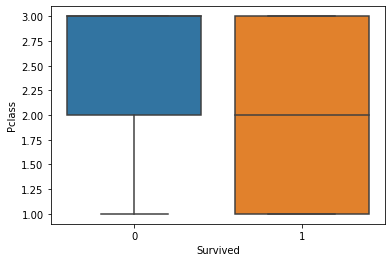

In [169]:
sns.boxplot(x="Survived",y="Pclass",data=data)
plt.show()

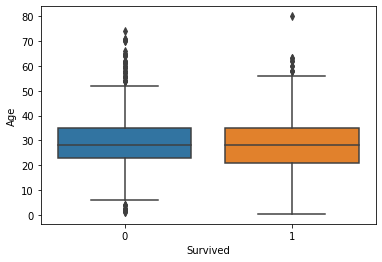

In [170]:
sns.boxplot(x="Survived",y="Age",data=data)
plt.show()

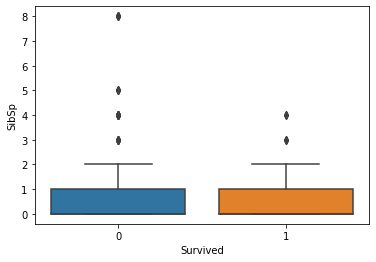

In [171]:
sns.boxplot(x="Survived",y="SibSp",data=data)
plt.show()

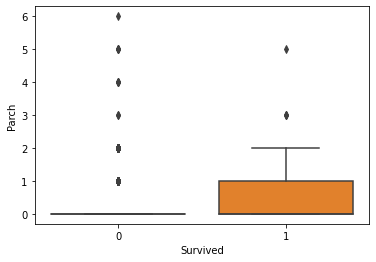

In [172]:
sns.boxplot(x="Survived",y="Parch",data=data)
plt.show()

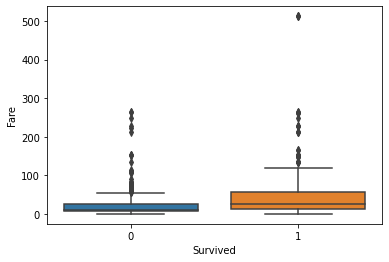

In [173]:
sns.boxplot(x="Survived",y="Fare",data=data)
plt.show()

####Conclusions:
1) No significant importance of feature is known.  
2) Features like Age,SibSp,Parch,Fare have many outliers

###Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


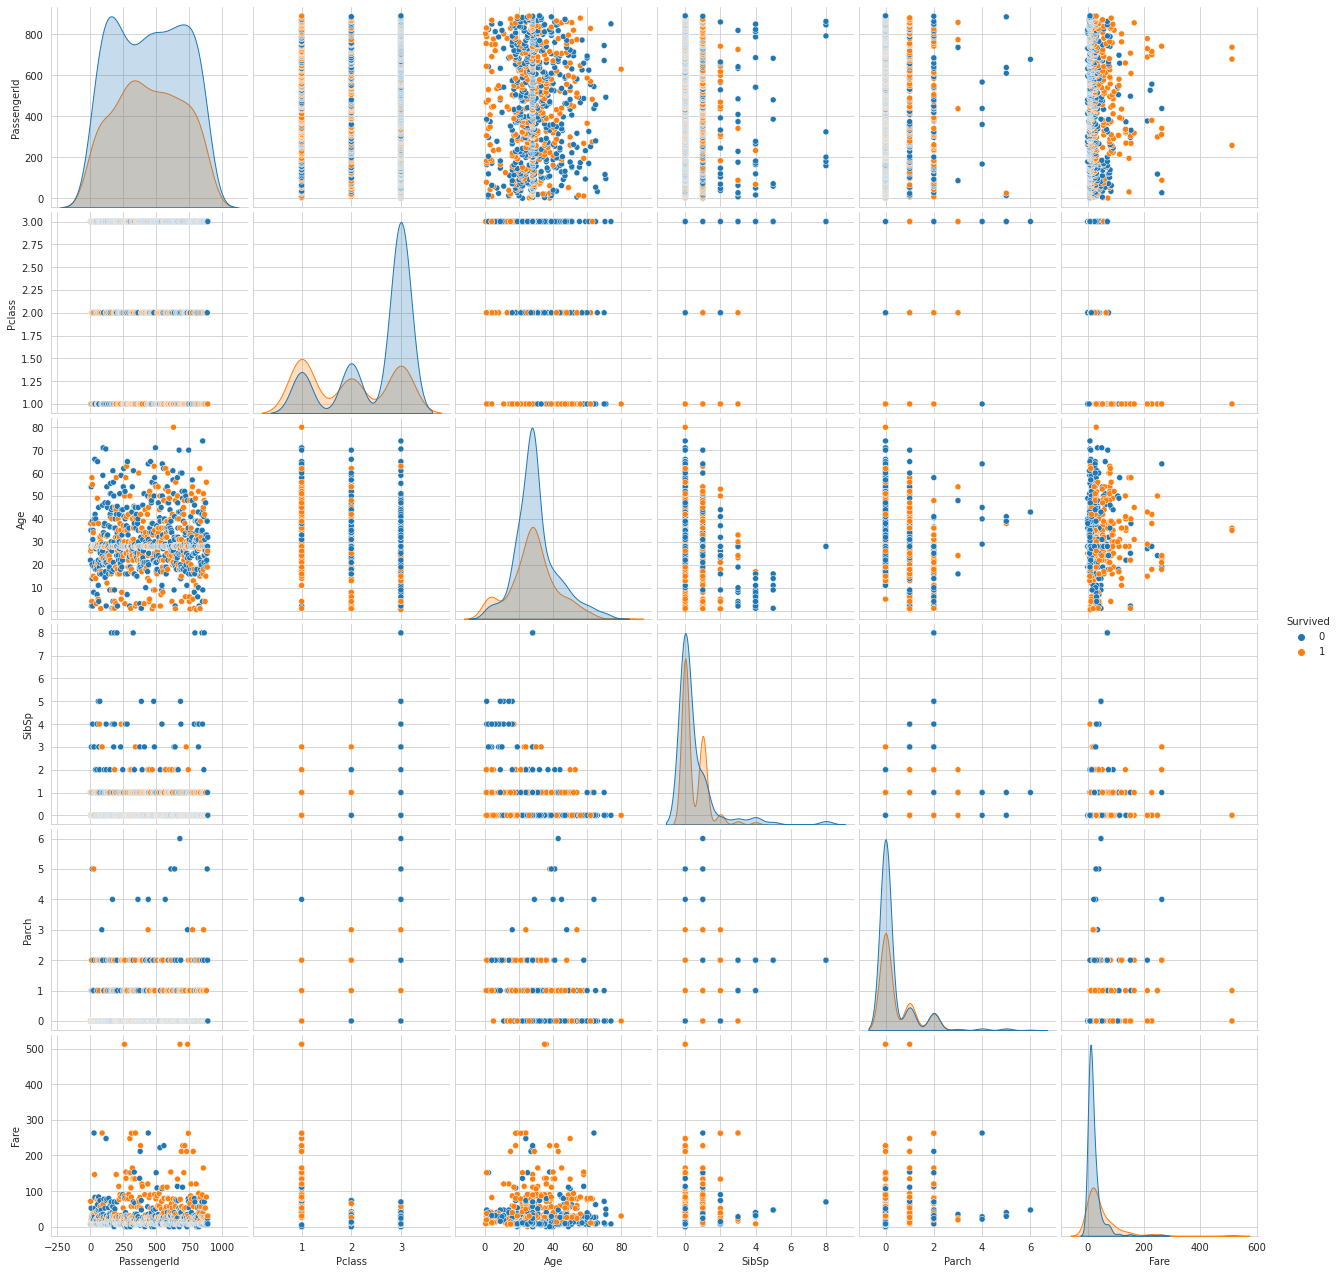

In [174]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Survived",size=3)
plt.show()

####Conclusion:  
1) No significant relation between features

##Handling Categorical Variables

In [175]:
# Checking number of unique values in Cabin
len(data['Cabin'].unique())

147

In [176]:
# Converting Sex to a numerical value
data['Sex'] = pd.get_dummies(data['Sex'])

In [177]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,G6,S


In [178]:
# One Hot Encoding the Embarked column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df = data['Embarked'].values.reshape(len(data['Embarked']), 1)
df2 = ohe.fit_transform(df)

In [179]:
# Creating columns based on the above
dfC = df2[:,0].reshape(len(df2[:,0]),1).flatten()
dfC = pd.Series(list(dfC))
data['C'] = dfC

dfQ = df2[:,1].reshape(len(df2[:,1]),1).flatten()
dfQ = pd.Series(list(dfQ))
data['Q'] = dfQ

dfS = df2[:,2].reshape(len(df2[:,2]),1).flatten()
dfS = pd.Series(list(dfS))
data['S'] = dfS

In [180]:
# Dropping the original column Embarked
data.drop('Embarked',axis=1,inplace=True)

##Feature Engineering

In [181]:
# Creating a new Feature from Name called Salutation
l=[]
for name in data['Name']:
  l.append(name.split(",")[1].split(".")[0])
data['Salutation'] = pd.Series(l)

In [182]:
data['Salutation'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [183]:
data['Salutation'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Mme               1
 Ms                1
 Sir               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Lady              1
Name: Salutation, dtype: int64

In [184]:
index=-1
for x in data['Age']:
  index+=1
  if x==" Ms":
    break
data.loc[index,'Salutation'] = " Miss"

In [185]:
s = [" Mr"," Miss"," Mrs"," Master"," Rare"]
index=-1
for x in data['Salutation']:
  index+=1
  if x not in s:
    data.loc[index,'Salutation'] = " Rare"


In [186]:
dt = pd.get_dummies(data['Salutation'])
for x in data['Salutation'].unique():
  data["Title-"+x] = dt[x]

In [187]:
data.drop("Salutation",axis=1,inplace=True)
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,G6,0.0,0.0,1.0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,G6,0.0,0.0,1.0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,G6,0.0,0.0,1.0,1,0,0,0,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,G6,0.0,1.0,0.0,1,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0,0.0,1.0,1,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,G6,0.0,0.0,1.0,0,0,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,G6,0.0,0.0,1.0,0,1,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,1.0,0.0,0.0,0,1,0,0,0


In [188]:
data['Travelled_Alone'] = 1
index=0
for x,y in zip(data['SibSp'],data['Parch']):
  if x+y == 0:
    data.loc[index,'Travelled_Alone'] = 1
  else:
    data.loc[index,'Travelled_Alone'] = 0
  index+=1

In [189]:
# Creating a new Feature from Cabin called Cabin_No
l=[]
for n in data['Cabin']:
  l.append(n[0])
data['Cabin_No'] = pd.Series(l)

In [190]:
data['Cabin_No'].unique()

array(['G', 'C', 'E', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [191]:
dt = pd.get_dummies(data['Cabin_No'])
for x in data['Cabin_No'].unique():
  data["Deck "+x] = dt[x]

In [192]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Cabin_No,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,G6,0.0,0.0,1.0,1,0,0,0,0,0,G,1,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0,1,0,0,0,0,C,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,G6,0.0,0.0,1.0,0,0,1,0,0,1,G,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0,1,0,0,0,0,C,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,G6,0.0,0.0,1.0,1,0,0,0,0,1,G,1,0,0,0,0,0,0,0


In [193]:
# Creating a new Feature from Cabin called No_of_rooms
l=[]
for n in data['Cabin']:
  l.append(len(n.split(" ")))
data['No_of_rooms'] = pd.Series(l)

In [194]:
data['Fare_per_person'] = 1
index=0
for x,y in zip(data['SibSp'],data['Parch']):
  if data.loc[index,'Travelled_Alone'] == 1:
    data.loc[index,'Fare_per_person'] = (data.loc[index,'Fare'])
  else:
    data.loc[index,'Fare_per_person'] = (data.loc[index,'Fare'])/(x+y+1)
  index+=1

In [195]:
# Dropping unnecessary columns
data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Cabin_No,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T,No_of_rooms,Fare_per_person
0,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0,1,0,0,0,0,0,G,1,0,0,0,0,0,0,0,1,3.62500
1,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0,1,0,0,0,0,C,0,1,0,0,0,0,0,0,1,35.64165
2,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0,0,0,1,0,0,1,G,1,0,0,0,0,0,0,0,1,7.92500
3,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0,1,0,0,0,0,C,0,1,0,0,0,0,0,0,1,26.55000
4,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0,1,0,0,0,0,1,G,1,0,0,0,0,0,0,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,0.0,1.0,0,0,0,0,1,1,G,1,0,0,0,0,0,0,0,1,13.00000
887,1,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,0,0,1,0,0,1,B,0,0,0,0,0,1,0,0,1,30.00000
888,0,3,1,28.0,1,2,23.4500,0.0,0.0,1.0,0,0,1,0,0,0,G,1,0,0,0,0,0,0,0,1,5.86250
889,1,1,0,26.0,0,0,30.0000,1.0,0.0,0.0,1,0,0,0,0,1,C,0,1,0,0,0,0,0,0,1,30.00000


In [196]:
data.drop('Cabin_No',axis=1,inplace=True)

In [197]:
data.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T,No_of_rooms,Fare_per_person
0,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3.625000
1,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,35.641650
2,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,7.925000
3,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,26.550000
4,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,8.050000
5,0,3,0,28.0,0,0,8.4583,0.0,1.0,0.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,8.458300
6,0,1,0,54.0,0,0,51.8625,0.0,0.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,51.862500
7,0,3,0,2.0,3,1,21.0750,0.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,4.215000
8,1,3,1,27.0,0,2,11.1333,0.0,0.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3.711100
9,1,2,1,14.0,1,0,30.0708,1.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,15.035400


In [198]:
# Seperating independent variables and dependent variables
y = data['Survived']
X = data.drop(['Survived','S'],axis=1)

In [199]:
# Converting from float to int
X['Age'] = X['Age'].astype(int)
X['Fare'] = X['Fare'].astype(int)
X['C'] = X['C'].astype(int)
X['Q'] = X['Q'].astype(int)
X['Fare_per_person'] = X['Fare_per_person'].astype(int)

In [200]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T,No_of_rooms,Fare_per_person
0,3,0,22,1,0,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3
1,1,1,38,1,0,71,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,35
2,3,1,26,0,0,7,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,7
3,1,1,35,1,0,53,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,26
4,3,0,35,0,0,8,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,13
887,1,1,19,0,0,30,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,30
888,3,1,28,1,2,23,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,5
889,1,0,26,0,0,30,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,30


##Train Test Split

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

##Feature Scaling

In [202]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = X_train['Age'].values.reshape(len(X_train['Age']), 1)
X_train['Age'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [203]:
df = X_train['Fare'].values.reshape(len(X_train['Fare']), 1)
X_train['Fare'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
df = X_train['SibSp'].values.reshape(len(X_train['SibSp']), 1)
X_train['SibSp'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [205]:
df = X_train['Parch'].values.reshape(len(X_train['Parch']), 1)
X_train['Parch'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
df = X_train['No_of_rooms'].values.reshape(len(X_train['Parch']), 1)
X_train['No_of_rooms'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
df = X_train['Fare_per_person'].values.reshape(len(X_train['Fare_per_person']), 1)
X_train['Fare_per_person'] = sc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [208]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           668 non-null    int64  
 1   Sex              668 non-null    uint8  
 2   Age              668 non-null    float64
 3   SibSp            668 non-null    float64
 4   Parch            668 non-null    float64
 5   Fare             668 non-null    float64
 6   C                668 non-null    int64  
 7   Q                668 non-null    int64  
 8   Title- Mr        668 non-null    uint8  
 9   Title- Mrs       668 non-null    uint8  
 10  Title- Miss      668 non-null    uint8  
 11  Title- Master    668 non-null    uint8  
 12  Title- Rare      668 non-null    uint8  
 13  Travelled_Alone  668 non-null    int64  
 14  Deck G           668 non-null    uint8  
 15  Deck C           668 non-null    uint8  
 16  Deck E           668 non-null    uint8  
 17  Deck D        

In [209]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T,No_of_rooms,Fare_per_person
105,3,0,-0.115870,-0.460372,-0.477210,-0.493038,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.142712,-0.334953
68,3,1,-0.963049,2.985323,1.956197,-0.493038,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,-0.142712,-0.491384
253,3,0,0.038162,0.401052,-0.477210,-0.315203,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.142712,-0.308881
320,3,0,-0.577968,-0.460372,-0.477210,-0.493038,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.142712,-0.334953
706,2,1,1.193406,-0.460372,-0.477210,-0.374481,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,-0.142712,-0.178522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,0.731309,0.401052,0.739493,1.008674,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,-0.142712,0.186484
192,3,1,-0.809017,0.401052,-0.477210,-0.493038,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,-0.142712,-0.439240
629,3,0,-0.115870,-0.460372,-0.477210,-0.493038,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.142712,-0.334953
559,3,1,0.500260,0.401052,-0.477210,-0.295444,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.142712,-0.308881


In [210]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,Title- Mr,Title- Mrs,Title- Miss,Title- Master,Title- Rare,Travelled_Alone,Deck G,Deck C,Deck E,Deck D,Deck A,Deck B,Deck F,Deck T,No_of_rooms,Fare_per_person
count,668.000000,668.000000,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,6.680000e+02,6.680000e+02
mean,2.305389,0.345808,2.592736e-17,8.841896e-17,1.055377e-16,-3.988825e-17,0.173653,0.089820,0.589820,0.139222,0.197605,0.049401,0.023952,0.604790,0.767964,0.064371,0.043413,0.038922,0.020958,0.049401,0.013473,0.001497,1.073659e-15,-1.022136e-17
std,0.837377,0.475988,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,0.379094,0.286138,0.492235,0.346437,0.398491,0.216867,0.153015,0.489262,0.422448,0.245597,0.203938,0.193554,0.143351,0.216867,0.115375,0.038691,1.000749e+00,1.000749e+00
min,1.000000,0.000000,-2.272326e+00,-4.603716e-01,-4.772100e-01,-6.313532e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.427116e-01,-5.174560e-01
25%,2.000000,0.000000,-5.202056e-01,-4.603716e-01,-4.772100e-01,-4.930377e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.427116e-01,-3.349531e-01
50%,3.000000,0.000000,-1.158703e-01,-4.603716e-01,-4.772100e-01,-3.547221e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.427116e-01,-3.088812e-01
75%,3.000000,1.000000,5.002598e-01,4.010520e-01,-4.772100e-01,-1.881281e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.427116e-01,8.219659e-02
max,3.000000,1.000000,3.888975e+00,6.431017e+00,6.823010e+00,9.485444e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.390423e+00,1.283133e+01


##Model Selection

In [211]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [212]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [213]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [214]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [215]:
from sklearn.svm import SVC
classifier5 = SVC(kernel = 'linear', random_state = 0)
classifier5.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [216]:
from sklearn.neighbors import KNeighborsClassifier
classifier6 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier6.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [217]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression(random_state = 0)
classifier7.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
from xgboost import XGBClassifier
# Instantiate our model
xg = XGBClassifier(learning_rate=0.01, n_estimators=10000,
                   max_depth= 29, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )
xg.fit(X_train, y_train)

xg_predictions = xg.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, xg_predictions)
print(cm)
accuracy_score(y_test, xg_predictions)

[[122  17]
 [ 26  58]]


0.8071748878923767

##Checking Predictions

In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Random Forest")
print(cm)
accuracy_score(y_test, y_pred)

Random Forest
[[111  28]
 [ 18  66]]


0.7937219730941704

In [220]:
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Decision Tree")
print(cm)
accuracy_score(y_test, y_pred)

Decision Tree
[[ 28 111]
 [ 22  62]]


0.40358744394618834

In [221]:
y_pred = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Naive Bayes")
print(cm)
accuracy_score(y_test, y_pred)

Naive Bayes
[[  0 139]
 [  0  84]]


0.37668161434977576

In [222]:
y_pred = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Non-Linear SVM")
print(cm)
accuracy_score(y_test, y_pred)

Non-Linear SVM
[[139   0]
 [ 84   0]]


0.6233183856502242

In [223]:
y_pred = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Linear SVM")
print(cm)
accuracy_score(y_test, y_pred)

Linear SVM
[[91 48]
 [11 73]]


0.7354260089686099

In [224]:
y_pred = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("KNN")
print(cm)
accuracy_score(y_test, y_pred)

KNN
[[58 81]
 [ 7 77]]


0.6053811659192825

In [225]:
y_pred = classifier7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression")
print(cm)
accuracy_score(y_test, y_pred)

Logistic Regression
[[119  20]
 [ 44  40]]


0.7130044843049327

###Conclusion:
The best model for this data came out to be XGBoost Classifier followed by the Random Forest Classifier.